In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices #patsy is a Python library for describing statistical models and building Design Matrices using R-like formulas.
from sklearn.linear_model  import LogisticRegression 
from sklearn.cross_validation  import train_test_split,cross_val_score 
from sklearn import metrics 

dta = sm.datasets.fair.load_pandas().data 

C:\Users\SUMIT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\SUMIT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dta.shape

(6366, 9)

In [5]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666


In [14]:
df=pd.DataFrame(dta)

In [22]:
df['rate_marriage'].describe()

count    6366.000000
mean        4.109645
std         0.961430
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rate_marriage, dtype: float64

In [26]:
# add "affair" column: 1 represents having affairs, 0 represents not dta['affair'] = (dta.affairs > 
#0).astype(int) 
 
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \ religious + educ
+C(occupation) + C(occupation_husb)', dta, return_type="dataframe") 
 
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 
 
'C(occupation)[T.3.0]':'occ_3', 
 
'C(occupation)[T.4.0]':'occ_4', 
 
'C(occupation)[T.5.0]':'occ_5', 
 
'C(occupation)[T.6.0]':'occ_6', 
 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 
 
y = np.ravel(y) 

SyntaxError: EOL while scanning string literal (<ipython-input-26-64537123fd17>, line 4)

In [51]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [52]:
data = pd.read_csv("C:/Users/SUMIT/Downloads/ML Ineuron/Logistic-regression_final/Logistic-regression_final/diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
data.shape

(768, 9)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null object
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(5), int64(3), object(1)
memory usage: 54.1+ KB


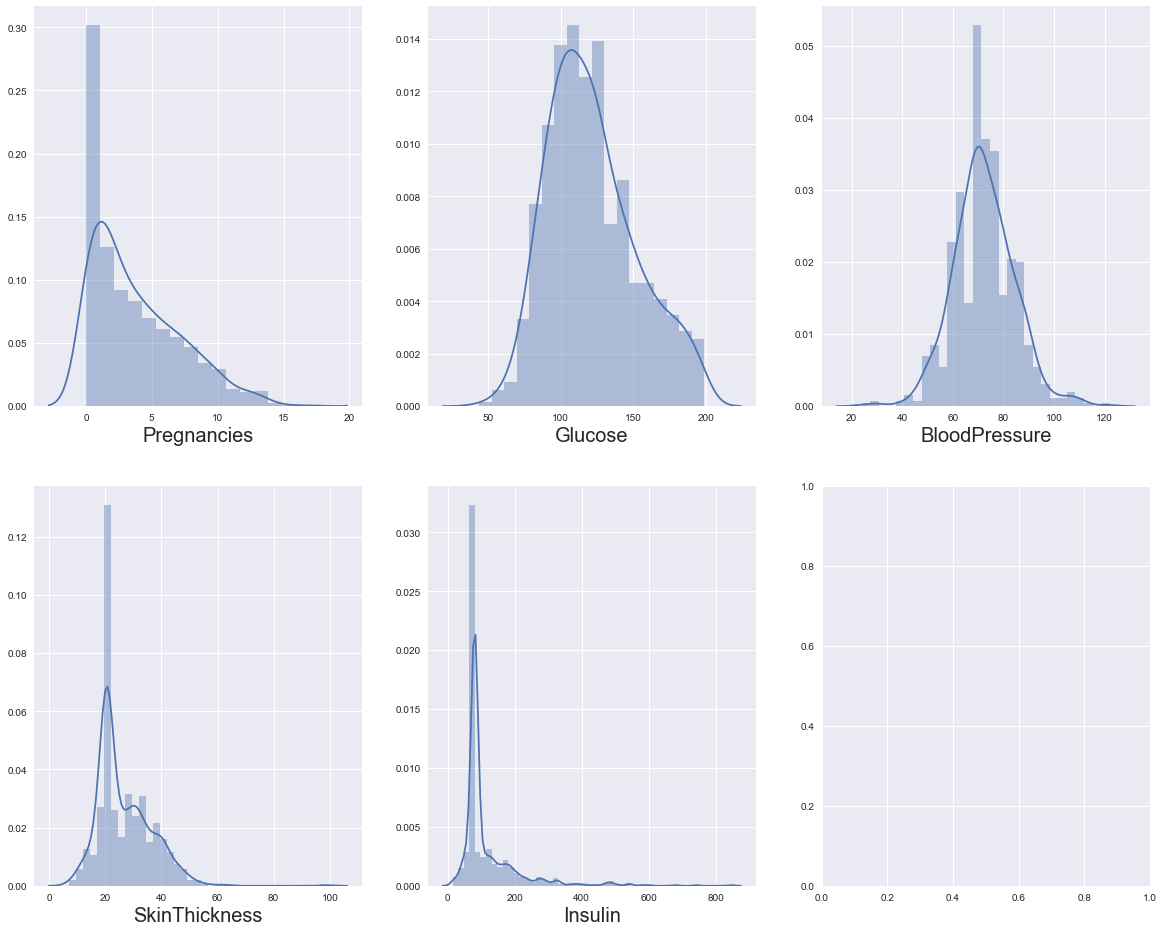

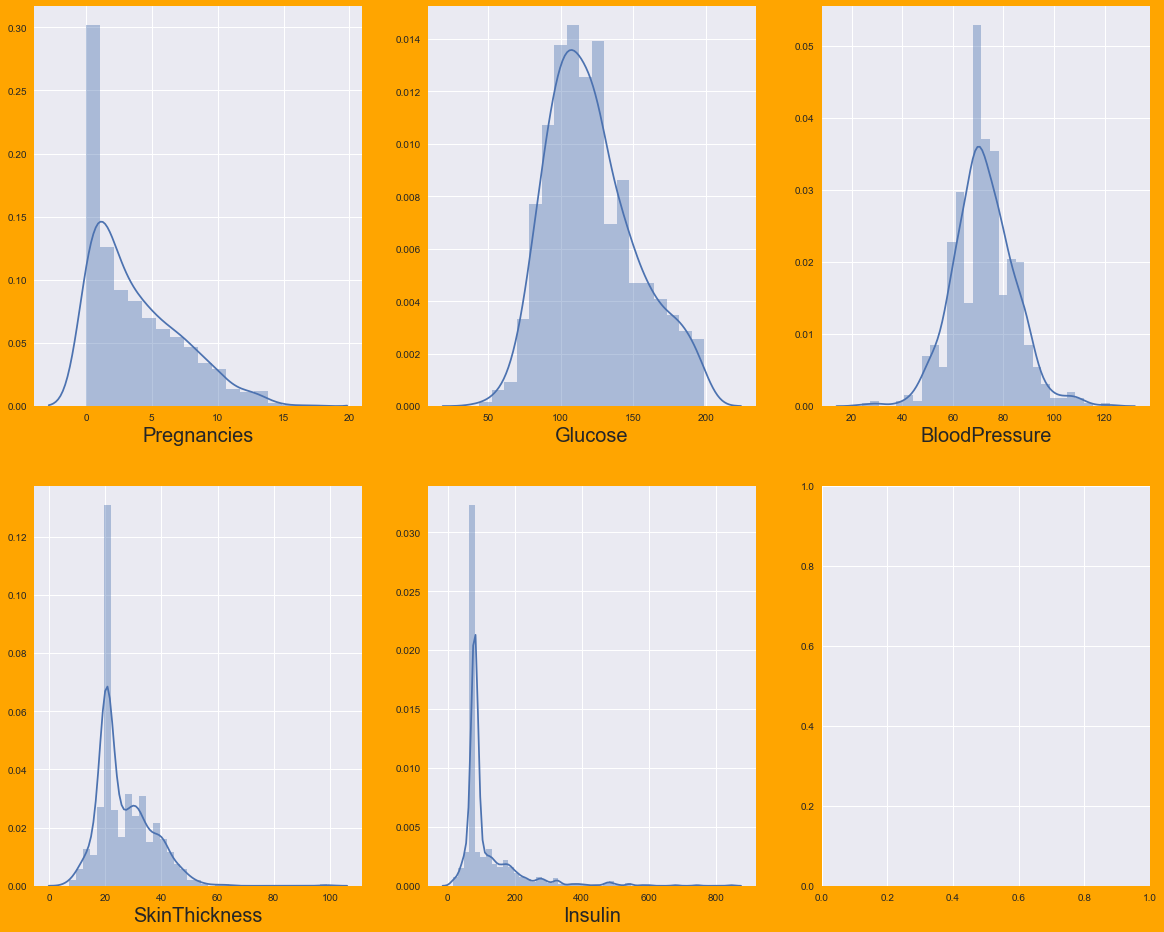

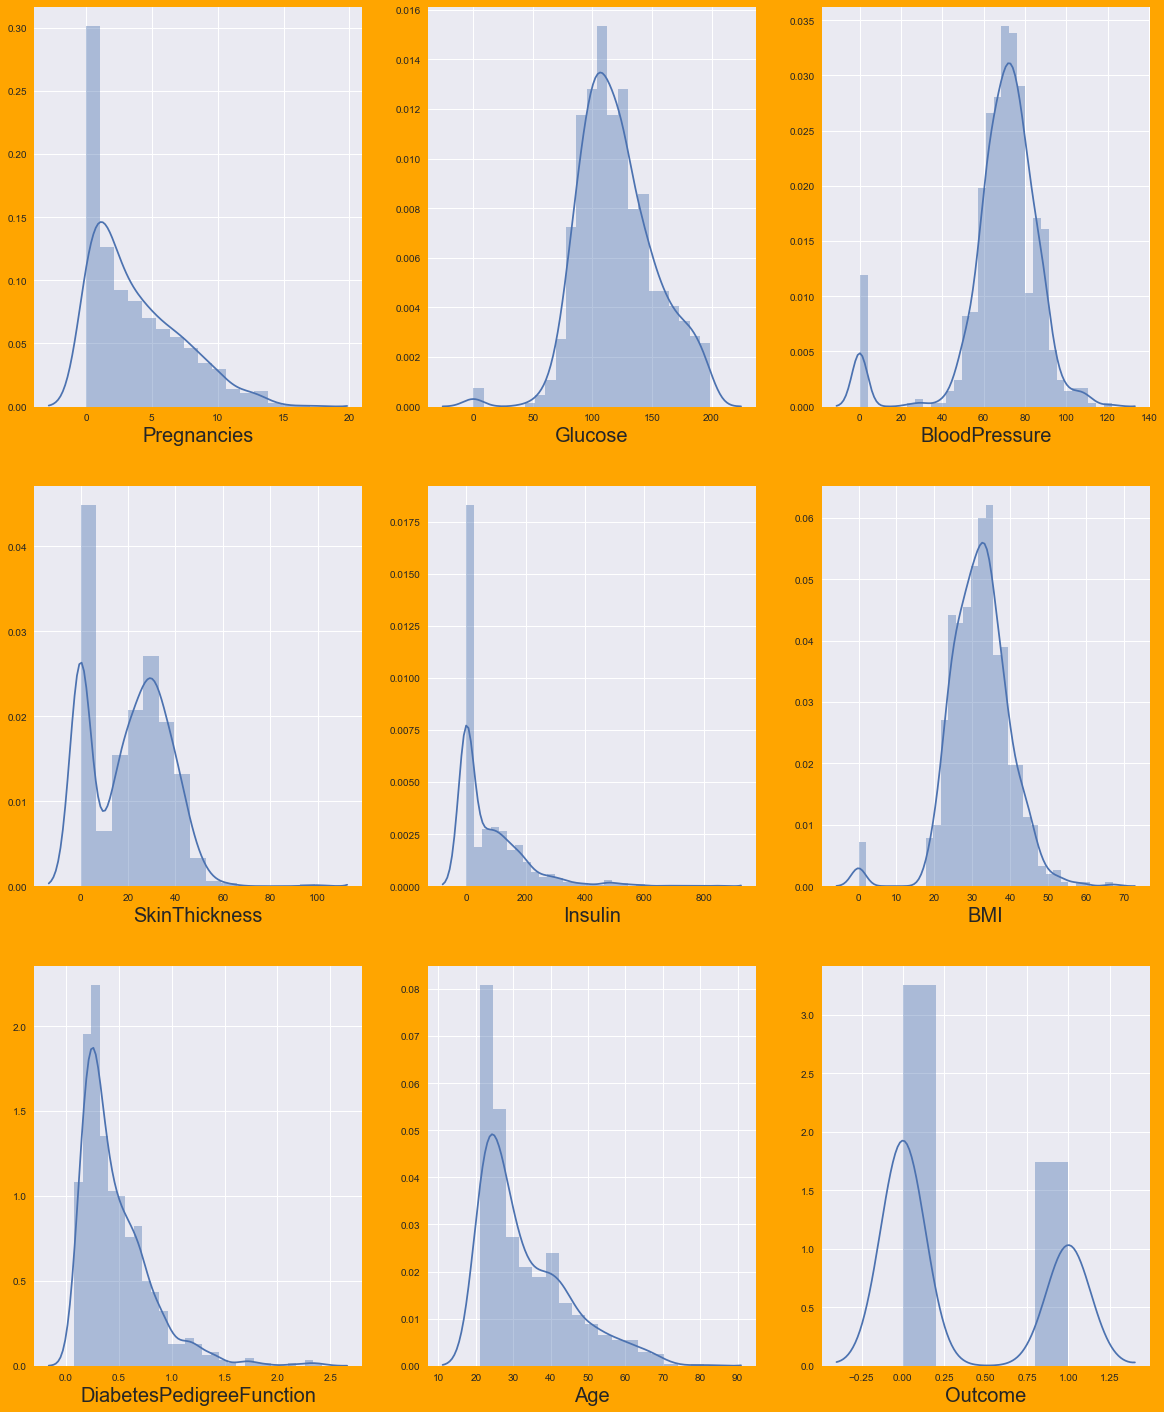

In [53]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='orange')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean)
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [56]:
# let's see how data is now distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'method'

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

TypeError: float() argument must be a string or a number, not 'method'

In [61]:
X = data.drop(['Outcome'])
y = data['Outcome']

ValueError: labels ['Outcome'] not contained in axis

In [64]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

NameError: name 'x' is not defined

In [ ]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [ ]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

In [ ]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

In [ ]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

In [ ]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()